## High variability genes

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap

In [6]:
df_un=df = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/RNAseq_un_merged.csv')

df_genes_clean = df_un.drop(columns=['record_id', 'Condició'])
df_genes_clean = df_genes_clean.apply(pd.to_numeric, errors='coerce')


In [7]:
mean_expression = df_genes_clean.mean(axis=0)  
std_expression = df_genes_clean.std(axis=0)

#combinar per al now df

stats = pd.DataFrame({
    'mean': mean_expression,
    'std': std_expression
})

In [8]:
# FILTRATGE
threshold = 2  # desviació estàndard > 2 vegades la mitjana
high_variability_genes = stats[stats['std'] > threshold * stats['mean']]

print(high_variability_genes)

              mean         std
10           0.344    0.942748
100124700    0.128    1.257083
100126296    0.280    0.713917
100126297    0.352    1.041525
100126315    0.840    4.851671
...            ...         ...
9947         0.112    0.443883
9951         3.648    8.065514
9965        10.344   37.587769
9982       116.592  305.572944
9992         0.480    1.542934

[3091 rows x 2 columns]


In [9]:
output_path = '/Users/carlabatlle/Documents/practiques/data/high_variability_genes.csv'
high_variability_genes.to_csv(output_path)

VISUALITZACIÓ

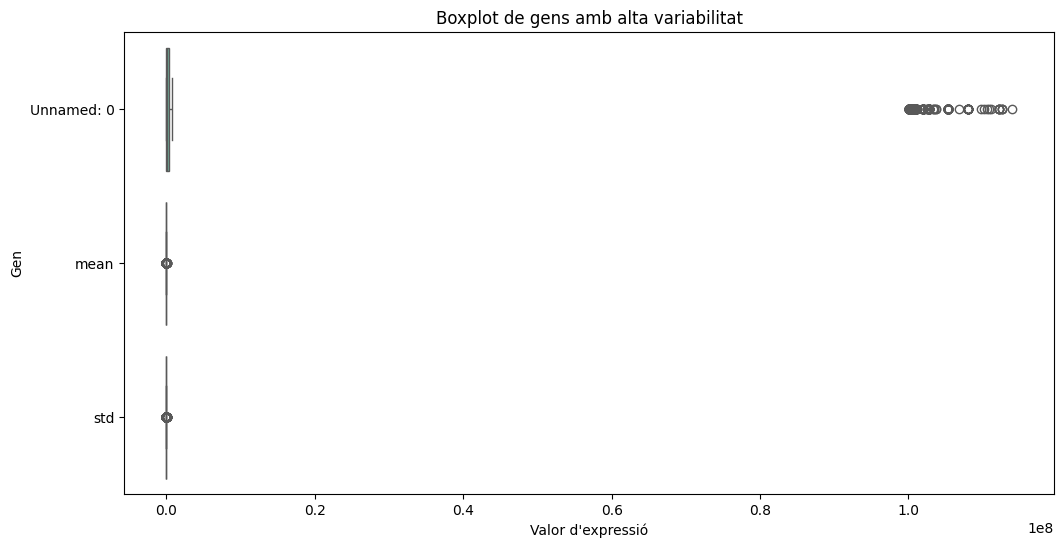

In [10]:
## VISUALITZACIÓ BOXPLOT
high_variability_data = pd.read_csv('/Users/carlabatlle/Documents/practiques/data/high_variability_genes.csv')

# Afegir la columna 'Condició' per fer el boxplot per grup
high_variability_data['Condició'] = df_un['Condició']

# Creem el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_variability_data.drop(columns='Condició'), 
            ax=plt.gca(), 
            orient='h', 
            palette='Set2')

# Afegir títol i etiquetes
plt.title('Boxplot de gens amb alta variabilitat')
plt.xlabel('Valor d\'expressió')
plt.ylabel('Gen')

# Mostrar el gràfic
plt.show()

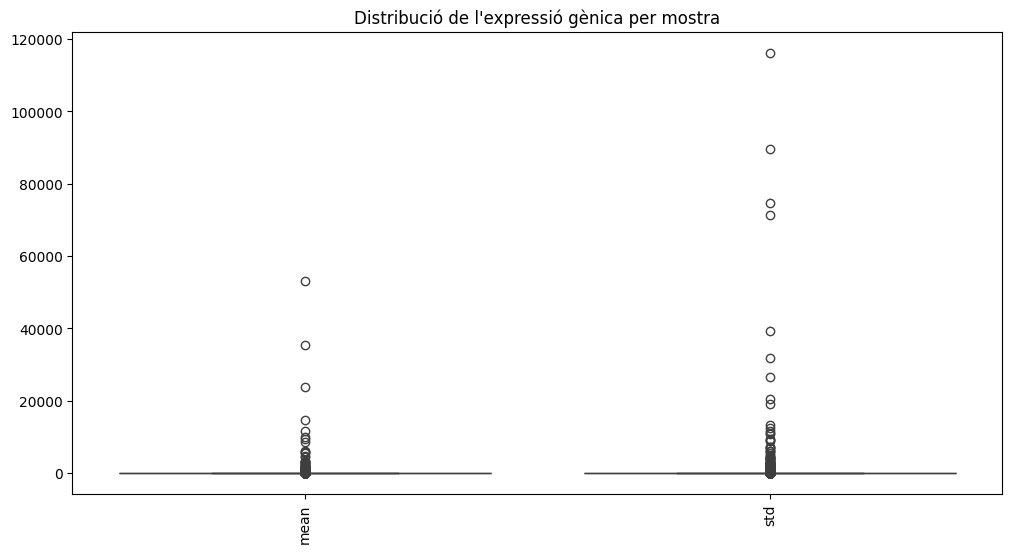

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=high_variability_data.iloc[:, 1:])  
plt.xticks(rotation=90)
plt.title("Distribució de l'expressió gènica per mostra")
plt.show()

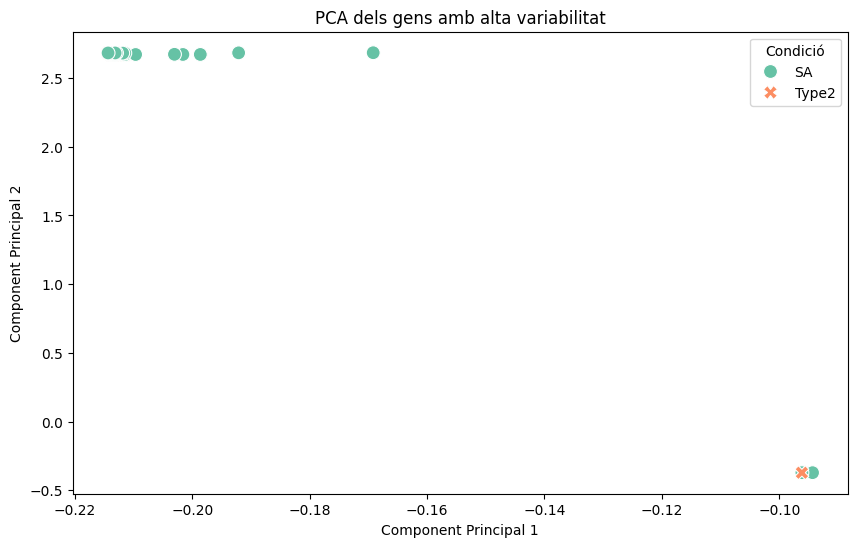

In [12]:
## VISUALITZACIÓ PCA
X = high_variability_data.drop(columns=['Condició'])
# Normalitzar les dades
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Aplicar PCA
pca = PCA(n_components=2)  # Podem agafar els 2 primers components principals per la visualització
principal_components = pca.fit_transform(X_scaled)
# Crear un DataFrame amb els components principals
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Condició'] = high_variability_data['Condició']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Condició', palette='Set2', style='Condició', s=100)
plt.title('PCA dels gens amb alta variabilitat')
plt.xlabel('Component Principal 1')
plt.ylabel('Component Principal 2')
plt.legend(title='Condició')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


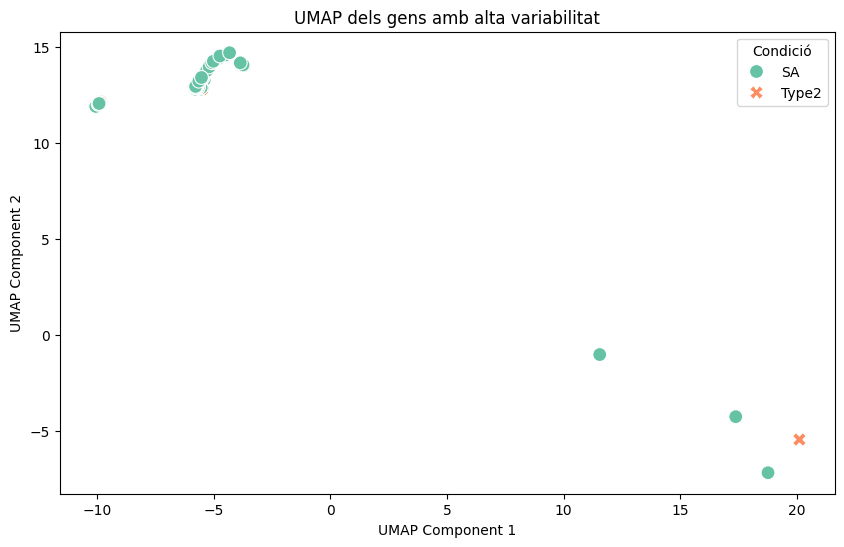

In [13]:
#VISUALITZACIÓ UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)  # Podem agafar els 2 primers components per visualitzar
umap_components = umap_model.fit_transform(X_scaled)
umap_df = pd.DataFrame(data=umap_components, columns=['UMAP1', 'UMAP2'])
# Afegir la columna 'Condició' al DataFrame de UMAP
umap_df['Condició'] = high_variability_data['Condició']

# Visualitzar els resultats de UMAP amb un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x='UMAP1', y='UMAP2', hue='Condició', palette='Set2', style='Condició', s=100)
plt.title('UMAP dels gens amb alta variabilitat')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Condició')
plt.show()

In [15]:
top_10_high_variability = high_variability_data.sort_values(by="mean", ascending=False).head(10)
print(top_10_high_variability)

      Unnamed: 0       mean            std Condició
2379        5968  53065.432  116143.359486      NaN
2588        6648  35319.424   74744.506553      NaN
2134        5068  23653.024   89540.297069      NaN
2804       80763  14701.072   71391.699554      NaN
2132       50624  11510.816   26645.031071      NaN
3072        9564   9813.928   31724.922188      NaN
538       121665   9382.656   39137.688467      NaN
2777        7980   8512.720   19039.552971      NaN
2421        6347   6075.136   12394.644498      NaN
1437        3383   5813.904   13313.601663      NaN


In [16]:
top_10_high_variability = high_variability_data.sort_values(by="std", ascending=False).head(10)
print(top_10_high_variability)

      Unnamed: 0       mean            std Condició
2379        5968  53065.432  116143.359486      NaN
2134        5068  23653.024   89540.297069      NaN
2588        6648  35319.424   74744.506553      NaN
2804       80763  14701.072   71391.699554      NaN
538       121665   9382.656   39137.688467      NaN
3072        9564   9813.928   31724.922188      NaN
2132       50624  11510.816   26645.031071      NaN
362        10562   5660.944   20550.412215      NaN
2777        7980   8512.720   19039.552971      NaN
1437        3383   5813.904   13313.601663      NaN
